In [67]:
w0_sn_ratio =  np.sum((w0_deriv[:, autocorr_inds]**2  / (c_ells[:, autocorr_inds] + num_dens)**2)

SyntaxError: unexpected EOF while parsing (<ipython-input-67-cf02eb1b3827>, line 1)

In [62]:
c_ells[:, autocorr_inds][:, :] + num_dens[:]

array([[1.03569588e+09, 9.97648343e+08, 4.16577303e+08, 1.52128323e+08,
        5.41097521e+07],
       [1.03569588e+09, 9.97648343e+08, 4.16577303e+08, 1.52128323e+08,
        5.41097521e+07],
       [1.03569588e+09, 9.97648343e+08, 4.16577303e+08, 1.52128323e+08,
        5.41097521e+07],
       ...,
       [1.03569588e+09, 9.97648343e+08, 4.16577303e+08, 1.52128323e+08,
        5.41097521e+07],
       [1.03569588e+09, 9.97648343e+08, 4.16577303e+08, 1.52128323e+08,
        5.41097521e+07],
       [1.03569588e+09, 9.97648343e+08, 4.16577303e+08, 1.52128323e+08,
        5.41097521e+07]])

In [69]:
num_dens.shape[0]

5

In [72]:
import matplotlib.pyplot as plt

In [70]:
tomo = np.loadtxt("tomo_lensing.dat")

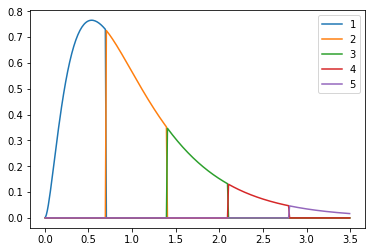

In [73]:
for i in range(1, 6):
    plt.plot(tomo[:, 0], tomo[:, i], label=str(i))
plt.legend()
plt.show()

# Tunings

In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
sn_vs_delta = np.loadtxt("out_sn_vs_delta/sn_vs_delta.dat")

In [64]:
df = pd.DataFrame(sn_ratios, columns=["Delta", "Signal to Noise Ratio"])

In [65]:
df.set_index("Delta", inplace=True)

In [66]:
df["Signal to Noise Ratio - Relative"] = df["Signal to Noise Ratio"]/df["Signal to Noise Ratio"].iloc[-1]

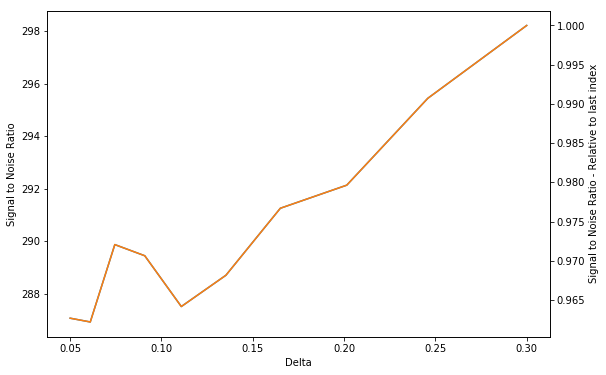

In [68]:
ax = df.plot(figsize=(9, 6), y=["Signal to Noise Ratio"], legend=False)
plt.ylabel("Signal to Noise Ratio")
df.plot(ax=ax, y="Signal to Noise Ratio - Relative", secondary_y=True, legend=False)
plt.xlabel("Delta")
plt.ylabel("Signal to Noise Ratio - Relative to last index")
plt.show()

In [51]:
import os

In [60]:
sn_ratios = np.zeros((10, 2))
for i, fpath in enumerate(os.listdir('out_w0_sn_all/')):
    delta = float(fpath[-14:])
    sn = np.loadtxt('out_w0_sn_all/' + fpath + '/w0_sn_ratio.dat')
    sn_ratios[i, 0] = delta
    sn_ratios[i, 1] = sn

In [63]:
sn_ratios = sn_ratios[sn_ratios[:,0].argsort()]

In [28]:
deriv_plus = np.loadtxt("out_w0_sn_ratio/.Cl_upper_1_step.dat")
deriv_minus = np.loadtxt("out_w0_sn_ratio/.Cl_lower_1_step.dat")

In [29]:
c_ell = np.loadtxt("Cl_fid.dat")

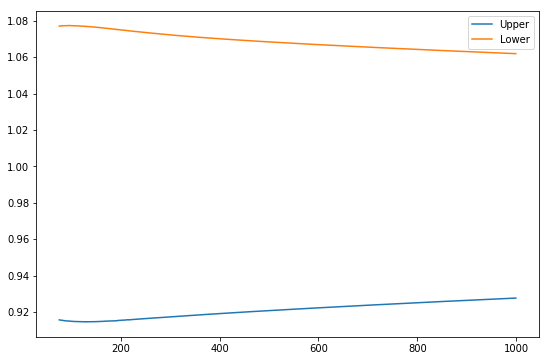

In [30]:
fig = plt.figure(figsize=(9,6))
plt.plot(deriv_plus[:, 0], deriv_plus[:, 1]/c_ell[:, 1], label="Upper")
plt.plot(deriv_minus[:, 0], deriv_minus[:, 1]/c_ell[:, 1], label="Lower")
# plt.plot(c_ell[:, 0], c_ell[:, 1], label="c_ell")
plt.legend()
plt.show()

In [203]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy.integrate import simps
import matplotlib.pyplot as plt

In [12]:
a = np.loadtxt("../zdistri_model_z0=1.100000e-01_beta=6.800000e-01_Y10_source")

In [13]:
z_support = a[:, 1]
photoZ = a[:, -1]

In [261]:
def get_equal_num_gal_bins(nbins, z_support, photoZ, int_f=np.trapz):
    total_area = int_f(photoZ, z_support)
    target_area = total_area/nbins
    error_tol = 0.01
    
    cols = nbins + 1
    rows = len(z_support)
    bins = np.zeros((rows, cols))
    
    bins[:, 0] = z_support
    
    
    start_in = 0
    bin_spacing_equal = int(np.floor(len(photoZ)/nbins))
    end_in = bin_spacing_equal
    last_end_in = end_in
    last_diff = 0
    inds = [0]
    
    if nbins == 1:
        bins[:, 1] = photoZ
        return inds, bins
    
    for cur_bin in range(nbins-1):
        cur_area = int_f(photoZ[start_in: end_in], z_support[start_in:end_in])
        while abs(cur_area - target_area) > error_tol:
            print(cur_area, target_area, cur_area-target_area, error_tol)
            if cur_area > target_area:
                last_end_in = end_in
                if last_diff >= 0:
                    end_in = end_in - (end_in-start_in)//2
                elif last_diff < 0:
                    end_in = end_in - (last_end_in-end_in)//2
                last_diff = 1
            else:
                last_end_in = end_in
                if last_diff <= 0:
                    end_in = end_in + (end_in-start_in)//2
                elif last_diff > 0:
                    end_in = end_in + (end_in - last_end_in)//2
                last_diff = -1
            cur_area = int_f(photoZ[start_in:end_in], z_support[start_in: end_in])
        inds.append(end_in)
        start_in = end_in -1
        end_in = start_in + bin_spacing_equal
        
    # now that we have the start indeces of the bins, we
    # make the bins
    for col,_ in enumerate(inds):
        print(col, len(inds))
        if col == 0:
            bins[: inds[col+1], col+1] = photoZ[: inds[col+1]]
        elif col < cols -2:
            bins[inds[col]-1:inds[col+1], col+1] = photoZ[inds[col]-1:inds[col+1]]
        else:
            bins[inds[col]-1:, col+1] = photoZ[inds[col]-1:]

    return inds, bins

In [285]:
def get_equal_num_gal_bins2(nbins, z_support, photoZ, int_f=np.trapz):
    total_area = int_f(photoZ, z_support)
    target_area = total_area/nbins
    error_tol = 0.001
    
    cols = nbins + 1
    rows = len(z_support)
    bins = np.zeros((rows, cols))
    
    bins[:, 0] = z_support
    
    
    start_in = 0
    bin_spacing_equal = int(np.floor(len(photoZ)/nbins))
    end_in = bin_spacing_equal
    last_end_in = end_in
    last_last_end_in = end_in
    last_area = 0
    last_last_area = 0
    inds = [0]
    
    if nbins == 1:
        bins[:, 1] = photoZ
        return inds, bins
    
    for cur_bin in range(nbins-1):
        cur_area = int_f(photoZ[start_in: end_in], z_support[start_in:end_in])
        while abs(cur_area - target_area) > error_tol:
#             print(cur_area, target_area, cur_area-target_area, error_tol)
            if cur_area == last_last_area:
                if abs(cur_area - target_area) <= abs(last_area-target_area):
                    break
                else:
                    end_in = last_end_in
                    break
            last_last_area = last_area
            last_last_end_in = last_end_in
            last_area = cur_area
            last_end_in = end_in
            if cur_area > target_area:
                end_in -= 1
            else:
                end_in += 1
            cur_area = int_f(photoZ[start_in:end_in], z_support[start_in: end_in])
        inds.append(end_in)
        start_in = end_in -1
        end_in = start_in + bin_spacing_equal
        
    # now that we have the start indeces of the bins, we
    # make the bins
    for col,_ in enumerate(inds):
        print(col, len(inds))
        if col == 0:
            bins[: inds[col+1], col+1] = photoZ[: inds[col+1]]
        elif col < cols -2:
            bins[inds[col]-1:inds[col+1], col+1] = photoZ[inds[col]-1:inds[col+1]]
        else:
            bins[inds[col]-1:, col+1] = photoZ[inds[col]-1:]

    return inds, bins

(0, 3)
(1, 3)
(2, 3)


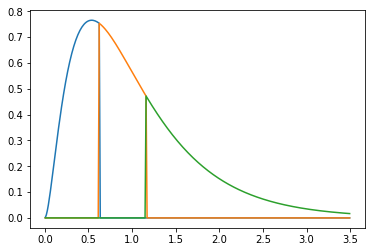

In [286]:
inds, bins = get_equal_num_gal_bins2(3, z_support, photoZ, simps)
for i in range(len(bins[0])-1):
    plt.plot(bins[:, 0], bins[:, i+1])
b = inds

In [225]:
for i in bins:
    print i

[0.00583333 0.00149051 0.         0.         0.        ]
[0.01749999 0.01153721 0.         0.         0.        ]
[0.02916666 0.02845257 0.         0.         0.        ]
[0.04083332 0.05024624 0.         0.         0.        ]
[0.05249998 0.0755329  0.         0.         0.        ]
[0.06416665 0.1032853  0.         0.         0.        ]
[0.07583331 0.1327169  0.         0.         0.        ]
[0.08749997 0.1632134  0.         0.         0.        ]
[0.09916664 0.1942895  0.         0.         0.        ]
[0.1108333 0.225559  0.        0.        0.       ]
[0.1225    0.2567133 0.        0.        0.       ]
[0.1341666 0.287506  0.        0.        0.       ]
[0.1458333 0.3177402 0.        0.        0.       ]
[0.1575    0.3472597 0.        0.        0.       ]
[0.1691666 0.3759416 0.        0.        0.       ]
[0.1808333 0.4036903 0.        0.        0.       ]
[0.1924999 0.4304329 0.        0.        0.       ]
[0.2041666 0.4561154 0.        0.        0.       ]
[0.2158333 0.480699

0.3321742763248681
0.6670006027675133
0.9998912877712034


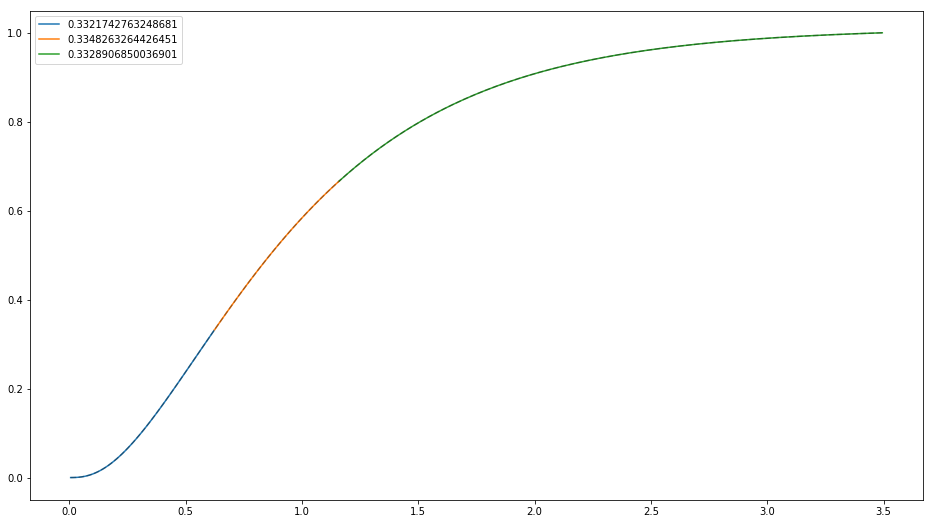

In [284]:
plt.figure(figsize=(16,9))
total = 0
for i,_ in enumerate(b):
    if i == 0:
        initial = 0
        last = 0
        y_int = sp.integrate.cumtrapz(photoZ[:b[i+1]], z_support[b[i]:b[i+1]], initial=initial)
        plt.plot(z_support[:b[i+1]], y_int + last, label=str(y_int[-1]))
    elif i < len(b)-1:
        initial = 0
        last += y_int[-1]
        y_int = sp.integrate.cumtrapz(photoZ[b[i]-1:b[i+1]], z_support[b[i]-1:b[i+1]], initial=initial)
        plt.plot(z_support[b[i]-1:b[i+1]], y_int + last, label=str(y_int[-1]))
    else:
        last += y_int[-1]
        y_int = sp.integrate.cumtrapz(photoZ[b[i]-1:], z_support[b[i]-1:], initial=initial)
        plt.plot(z_support[b[i]-1:], y_int + last, label=str(y_int[-1]))
    total += y_int[-1]
    print(total)
y_int_full = sp.integrate.cumtrapz(photoZ, z_support, initial=0)
plt.plot(z_support, y_int_full, 'k--', alpha=0.3)
plt.legend()
plt.show()

In [ ]:
for i,j in enumerate(b):
    if i < len(b)-1:
        print(simps(photoZ[b[i]:b[i+1]], z_support[b[i]:b[i+1]]))
    else:
        print(simps(photoZ[b[i]:], z_support[b[i]:]))

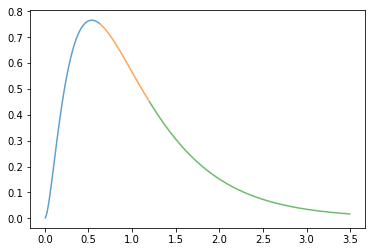

In [115]:
for i,j in enumerate(b):
    if i < len(b)-1:
        plt.plot(z_support[b[i]:b[i+1]], photoZ[b[i]:b[i+1]], alpha=0.7)
    else:
        plt.plot(z_support[b[i]:], photoZ[b[i]:], alpha=0.7)

In [233]:
tomo = np.loadtxt("../tomo_lensing.dat")

0.2034458768330484
0.21063285698047118
0.20805723838356566
0.20749527529323056
0.19735415764824957


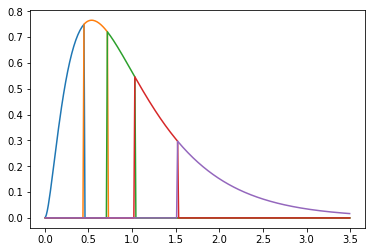

In [235]:
for i in range(5):
    plt.plot(tomo[:,0], tomo[:,i+1])
    print(simps(tomo[:, i+1], tomo[:, 0]))

In [237]:
np.loadtxt("../out_w0_sn_all/equal_space/1_bins/ordering_fid.dat").shape

(2,)

In [238]:
import os

In [239]:
os.listdir("../out_w0_sn_all/")

['equal_num',
 'equal_space',
 'lensing_bins_5_delta_1.00000000e-02',
 'lensing_bins_5_delta_1.19603317e-02',
 'lensing_bins_5_delta_1.43049534e-02',
 'lensing_bins_5_delta_1.71091988e-02',
 'lensing_bins_5_delta_2.04631692e-02',
 'lensing_bins_5_delta_2.44746291e-02',
 'lensing_bins_5_delta_2.92724682e-02',
 'lensing_bins_5_delta_3.50108430e-02',
 'lensing_bins_5_delta_4.18741295e-02',
 'lensing_bins_5_delta_5.00828478e-02',
 'lensing_bins_5_delta_5.99007471e-02']

In [240]:
import shutil

In [ ]:
shutil.

## SN Ratio with Cross Corr

In [16]:
import numpy as np
from numpy.linalg import inv
import sys
import os
import matplotlib.pyplot as plt

In [89]:
lvals = np.arange(76, 999 + 1) 
w0_deriv = np.loadtxt("../out_w0_sn_all/equal_space/3_bins/lensing_bins_3_delta_1.02485379e-01/deriv_w0.dat")[:, 1:]
c_ells = np.loadtxt("../out_w0_sn_all/equal_space/3_bins/Cl_fid.dat")[:, 1:]
num_dens = np.loadtxt("../out_w0_sn_all/equal_space/3_bins/num_dens_lensing.dat")

In [90]:
orderings = np.loadtxt("../out_w0_sn_all/equal_space/3_bins/ordering_fid.dat")

In [91]:
autocorr_inds = []
if orderings.shape == (2,):
    autocorr_inds = [0]
else:
    for i, order in enumerate(orderings):
        if order[0] == order[1]:
            autocorr_inds.append(i)

In [92]:
num_dens.shape
if orderings.shape == (2,):
    num_dens_with_cross = np.zeros((1,))
else:
    num_dens_with_cross = np.zeros(len(orderings))
num_dens_with_cross[autocorr_inds] = num_dens

In [93]:
autocorr_inds

[0, 2, 5]

In [94]:
num_dens_with_cross

array([2.22441880e-09, 0.00000000e+00, 5.39482535e-09, 0.00000000e+00,
       0.00000000e+00, 2.89221087e-08])

In [95]:
#auto corr only
ans = 0
for l, ell in enumerate(lvals):
    for i, ind in enumerate(autocorr_inds):
        ans += w0_deriv[:, autocorr_inds][l, i]**2 / (c_ells[:, autocorr_inds][l, i] + num_dens[i])**2
    

In [96]:
ans

278.1010332122271

In [61]:
#auto corr only 
(w0_deriv[:, autocorr_inds]**2  / (c_ells[:, autocorr_inds] + num_dens)**2).sum()

255.05057359714232

In [13]:
#cross corr

In [63]:
ans = 0
for l, ell in enumerate(lvals):
    for i, ind in enumerate(orderings):
        ans += w0_deriv[l, i]**2  / (c_ells[l, i] + num_dens_with_cross[i])**2
ans

1027.9101472679672

In [62]:
(w0_deriv**2  / (c_ells + num_dens_with_cross)**2).sum()

1027.9101472679695

In [83]:
(w0_deriv[:, 2]**2  / (c_ells[:, 2] + num_dens_with_cross[2])**2).sum()

109.24983601494586

In [ ]:
(w0_deriv[:, 2]**2  / (c_ells[:, 2] + num_dens_with_cross[2])**2).sum()

In [88]:
crosscorr_inds = np.delete(range(len(orderings)), autocorr_inds)
crosscorr_inds

array([1])

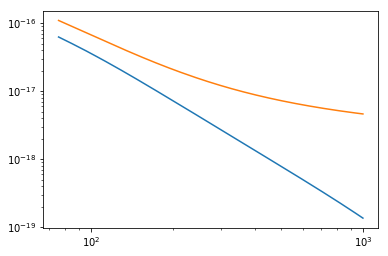

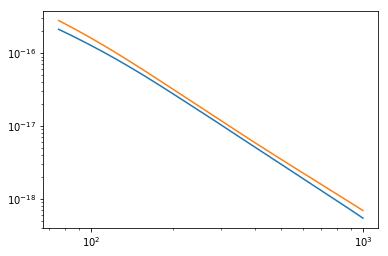

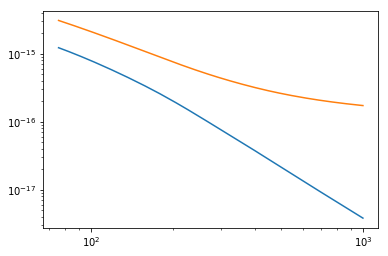

In [72]:
for i in range(len(w0_deriv[0])):
    plt.loglog(lvals, w0_deriv[:, i]**2)
    plt.loglog(lvals, (c_ells + num_dens_with_cross)[:, i]**2)
    plt.show()

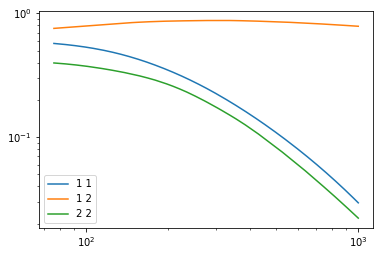

In [79]:
for i in range(len(w0_deriv[0])):
    plt.loglog(lvals, w0_deriv[:, i]**2/(c_ells + num_dens_with_cross)[:, i]**2, 
               label="%d %d"%(orderings[i][0],orderings[i][1],))
plt.legend()
plt.show()

# Calc cross corrs in sn ratio

In [363]:
import subprocess
from subprocess import Popen, PIPE
import os

In [350]:
eq_space = []
eq_num   = []
for i in range(4):
    eq_space.append("../out_w0_sn_all/auto_corr_only/equal_space/%d_bins/lensing_bins_%d_delta_1.02485379e-01/"%(i+1,i+1))
eq_space.append("../out_w0_sn_all/auto_corr_only/equal_space/5_bins/lensing_bins_5_delta_1.10870244e-01/")
#load in equal number
for i in range(5):
    eq_num.append("../out_w0_sn_all/auto_corr_only/equal_num/%d_bins/lensing_bins_%d_delta_1.02485379e-01/"%(i+1,i+1))

In [367]:
for i in eq_space:
    cmd = ["python", "../get_w0_sn_ratio.py", "lensing", os.path.join(i[:-36], "num_dens_lensing.dat"), "False", i[:-36], i[-36:]]
    process = subprocess.Popen(cmd, stdout=PIPE, stderr=PIPE)
    stdout, stderr = process.communicate()
    print stdout, stderr

 Traceback (most recent call last):
  File "../get_w0_sn_ratio.py", line 16, in <module>
    import numpy as np
  File "/home/naren/.local/lib/python2.7/site-packages/numpy/__init__.py", line 142, in <module>
    from . import core
  File "/home/naren/.local/lib/python2.7/site-packages/numpy/core/__init__.py", line 91, in <module>
    raise ImportError(msg.format(path))
ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/home/naren/.local/lib/python2.7/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

 Traceback (most recent call last):
  File "../get_w0_sn_ratio.py", line 16, in <module>
    import numpy as np
  File "/home/naren/.local/lib/python2.7/site-packages/numpy/__init__.py", line 142, in <module>
    from . import core
  File "/home/naren/.local/lib/python2.7/site-packages/numpy/core/__init__.py", line 91, in <module>
    rais

In [369]:
eq_space[0][:-36]

'../out_w0_sn_all/auto_corr_only/equal_space/1_bins/'

In [359]:
bool("")

False